In [1]:
!pip install mxnet
!pip install gluoncv

     |████████████████████████████████| 46.9MB 89kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 1.1MB 6.8MB/s 
     |████████████████████████████████| 14.1MB 307kB/s 
     |████████████████████████████████| 337kB 36.5MB/s 
     |████████████████████████████████| 122kB 43.8MB/s 
     |████████████████████████████████| 215kB 38.2MB/s 
     |████████████████████████████████| 716kB 34.4MB/s 
     |████████████████████████████████| 952kB 37.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 42.3MB/s 
     |████████████████████████████████| 22.3MB 31.2MB/s 
     |████████████████████████████████| 3.2MB 31.6MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 962kB 29.0MB/s 
     |███████████████

In [4]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt


In [5]:
image=mx.image.imread('cat.png')

In [6]:
image,chw_image=gcv.data.transforms.presets.yolo.transform_test(image,short=512)
print(image.shape)

(1, 3, 766, 512)


In [8]:
network=gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

100%|██████████| 224190/224190 [00:04<00:00, 46123.07KB/s]


In [10]:
prediction=network(image)

In [11]:
for index,array in enumerate(prediction):
  print('#{} shape: {}'.format(index+1,array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


In [12]:
prediction=[array[0] for array in prediction]

In [13]:
class_indicies,probabilities,bounding_boxes=prediction

In [15]:
k=10
print(class_indicies[:k])


[[15.]
 [57.]
 [59.]
 [14.]
 [23.]
 [13.]
 [28.]
 [56.]
 [71.]
 [60.]]
<NDArray 10x1 @cpu(0)>


In [19]:
network.classes[15]

'cat'

In [20]:
print(probabilities[:k])


[[0.7825761 ]
 [0.04498252]
 [0.04333419]
 [0.04012455]
 [0.0290308 ]
 [0.02199762]
 [0.01426259]
 [0.01241836]
 [0.01132165]
 [0.01071706]]
<NDArray 10x1 @cpu(0)>


In [21]:
print(bounding_boxes[:k])


[[ 26.865082  143.92046   503.80826   589.3402   ]
 [ -1.4226074 107.359344  525.33875   574.24133  ]
 [ -1.4226074 107.359344  525.33875   574.24133  ]
 [ 13.351379  281.06464   505.31824   767.878    ]
 [ 19.758255  238.10278   501.10315   748.8357   ]
 [ -1.4226074 107.359344  525.33875   574.24133  ]
 [ 26.865082  143.92046   503.80826   589.3402   ]
 [ 26.865082  143.92046   503.80826   589.3402   ]
 [ 26.865082  143.92046   503.80826   589.3402   ]
 [-23.01828    37.834595  545.15      572.66907  ]]
<NDArray 10x4 @cpu(0)>


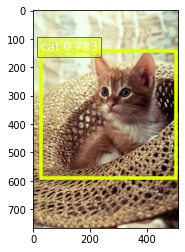

In [24]:
gcv.utils.viz.plot_bbox(chw_image,bounding_boxes,probabilities,class_indicies,class_names=network.classes)